# Tutoriel d'exemple de résolution d'un problème de machine learning à l'aide de la régression linéaire

## Problème à résoudre

Notre travail va consister à créer un algorithme qui prédit le prix médian des maisons dans un quartier de Californie en fonction de données telles que les revenus médians des habitants du quartier, la population du quartier, le nombre médian de chambres et de pièces... Pour cela, nous utiliserons [ce set de données](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html).

![Maison américaine](https://www.guardianstorage.com/wp-content/uploads/2018/12/new-homeowner-checklist.jpg)



## Techniques et outils utilisés

Pour résoudre ce problème, nous allons faire appel à une technique **d'apprentissage supervisé** basée sur la **régression linéaire**. Voici une description de ces termes :
- L'apprentissage supervisé est une technique qui consiste à entraîner un modèle de prédiction en lui donnant un set de données. Dans notre cas, nous allons utiliser nos données pour apprendre à notre modèle à prédire le prix médian des maisons dans un quartier selon les caractéristiques de ce dernier.
- La régression linéaire consiste à trouver une approximation de la fonction qui définit la relation entre différentes valeurs.

Nous allons utiliser la librairie scikit-learn pour réaliser ce projet.

## Code

### Importations des librairies

In [1]:
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

### Importation du dataset

Commençons par importer et explorer nos données :

In [2]:
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Comme cette description nous l'indique, ce dataset contient 20640 lignes, où chaque ligne correspond à un quartier. La valeur "cible", celle que nous cherchons à prédire, est la valeur médiane des maisons pour un quartier en centaines de milliers de dollars. Les 8 attributs numériques mentionnés sont les valeurs à partir desquelles on pourra réaliser des prédictions. Affichons les données pour voir plus clairement le format du dataset :

In [3]:
print(california_housing.frame)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

### Phase d'apprentissage du modèle

La première étape lors de l'utilisation d'une méthode d'apprentissage supervisée, c'est l'apprentissage. Dans cette étape, nous allons construire notre modèle en lui donnant un certain nombre d'exemples depuis notre base de données. La règle de base lors de cette étape est de séparer la base de données en deux : une partie pour l'apprentissage et une partie pour le test. Ceci afin de ne pas montrer lors de la phase de test des exemples de données qui auraient servis lors de la phase d'apprentissage, car alors le test serait biaisé.

In [4]:
housing_df = california_housing.frame

# Split data with 70% to train and 30% to test
train, test = train_test_split(housing_df, test_size=0.3)
x_train = train.drop(columns=["MedHouseVal"])
y_train = train["MedHouseVal"]
x_test = test.drop(columns=["MedHouseVal"])
y_test = test["MedHouseVal"]

Puis nous mettons en place notre modèle, l'entraînons et visualisons les résultats de l'entraînement :

In [5]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print("Coefficients : \n", regr.coef_)
# The mean squared error
print("Mean squared error : %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient de détermination : %.2f" % r2_score(y_test, y_pred))

Coefficients : 
 [ 4.29343724e-01  9.12228369e-03 -9.83339204e-02  5.94504903e-01
 -2.40304028e-06 -4.30701462e-03 -4.30138923e-01 -4.43669369e-01]
Mean squared error : 0.53
Coefficient de détermination : 0.61


Ce script affiche plusieurs informations importantes :
- Les coefficients : la régression linéaire consiste à trouver une fonction qui permet de prédire le prix médian des maisons à partir de 8 valeurs. Cette fonction est de la forme f(x) = a*f1 + b*f2 ... + h*f8 + i, où f1, f2, etc... sont les valeurs données en entrée et a, b, c etc.. sont les coefficients qui multiplient chaque valeur. Il s'agit des coefficients que l'on affiche ici.
- La MSE (mean squared error) est un indicateur qui évalue la précision de notre modèle.
- Le coefficient de détermination est un indicateur allant de 0 à 1 qui évalue la précision du modèle. Un coefficient de 65 %, par exemple, veut dire que 65 % des variations observées dans le prix médian des maisons peuvent être expliquées par les 8 variables d'entrée.

### Test d'un modèle alternatif avec moins de features

Notez que nous avons utilisé toutes les données disponibles dans le modèle ci-dessus. En réalité, il est souvent judicieux de sélectionner les features que l'on souhaite utiliser. Une "bonne" feature respecte les critères suivants :
- Elle n'est pas corrélée avec une autre feature (on parlera aussi de **variable indépendante**)
- De préférence, elle est corrélée, positivement ou négativement, avec la variable que l'on souhaite prédire (aussi appelée **variable dépendante**).

Dans un premier temps, afichons la matrice de corrélation qui montre les indices de corrélation entre toutes les variables :

<AxesSubplot:>

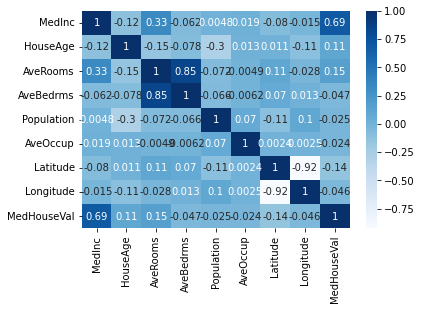

In [6]:
corr_matrix = housing_df.corr()
sns.heatmap(corr_matrix, cmap="Blues", annot=True)

Quelles informations pouvons-nous tirer de cette heatmap ?
- Les revenus moyens (MedInc) semblent être fortement corrélés à notre variable dépéndante (MedHouseVal), et constituent donc une variable importante pour notre modèle
- Le nombre moyen de chambres (AveBedrms) et le nombre moyens de pièces (AveRooms) sont fortement corrélés. Utiliser les deux à la fois risquerait d'affecter négativement la précision du modèle. La même situation apparaît pour les colonnes Latitude et Longitude.

Au vu de ces éléments, essayons de créer un nouveau modèle en enlevant les colonnes Longitude et AveBedrms pour voir si la précision du modèle peut être améliorée.

In [7]:
housing_df_2 = housing_df.copy()

# Split data with 70% to train and 30% to test
train, test = train_test_split(housing_df_2, test_size=0.3)
x_train = train.drop(columns=["MedHouseVal", "Longitude", "AveBedrms"])
y_train = train["MedHouseVal"]
x_test = test.drop(columns=["MedHouseVal", "Longitude", "AveBedrms"])
y_test = test["MedHouseVal"]

# Create linear regression object
regr_2 = linear_model.LinearRegression()

# Train the model using the training sets
regr_2.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr_2.predict(x_test)

# The coefficients
print("Coefficients : \n", regr_2.coef_)
# The mean squared error
print("Mean squared error : %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient de détermination : %.2f" % r2_score(y_test, y_pred))

Coefficients : 
 [ 4.44034446e-01  1.75254636e-02 -3.61228681e-02  2.07170437e-05
 -5.07444433e-03 -4.16027666e-02]
Mean squared error : 0.65
Coefficient de détermination : 0.52


On constate qu'enlever deux colonnes a eu un impact négatif sur la précision. Dans cette situation, enlever des colonnes n'est donc pas pertinent.

### Pour aller plus loin

Ce tutoriel vous a montré comment réaliser des modèles de régression linéaire. D'autres méthodes de régression existent. À titre d'exemple, voici le même modèle réalisé avec la **Ridge Regression**, ou régularisation de Tikhonov, également disponible dans scikit-learn :

In [11]:
x_train = train.drop(columns=["MedHouseVal"])
y_train = train["MedHouseVal"]
x_test = test.drop(columns=["MedHouseVal"])
y_test = test["MedHouseVal"]

regr_ridge = linear_model.Ridge(alpha=1.0)

regr_ridge.fit(x_train, y_train)
y_pred = regr_ridge.predict(x_test)

# The coefficients
print("Coefficients : \n", regr_ridge.coef_)
# The mean squared error
print("Mean squared error : %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient de détermination : %.2f" % r2_score(y_test, y_pred))

Coefficients : 
 [ 4.48679537e-01  9.54695940e-03 -1.29149089e-01  6.78445929e-01
 -2.86100907e-06 -4.60409085e-03 -4.09152738e-01 -4.24700757e-01]
Mean squared error : 0.53
Coefficient de détermination : 0.61


On notera que la régression de Ridge est une régression linéaire "améliorée" particulièrement adaptée aux cas où des variables indépendantes sont corrélées entre elles.

Enfin, voici un exemple de régression dite de **lasso** :

In [12]:
regr_lasso = linear_model.Lasso(alpha=0.1)

regr_lasso.fit(x_train, y_train)
y_pred = regr_lasso.predict(x_test)

# The coefficients
print("Coefficients : \n", regr_lasso.coef_)
# The mean squared error
print("Mean squared error : %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient de détermination : %.2f" % r2_score(y_test, y_pred))

Coefficients : 
 [ 3.90099318e-01  1.53892213e-02 -0.00000000e+00  0.00000000e+00
  2.14662903e-05 -3.79087432e-03 -1.16228563e-01 -1.02653757e-01]
Mean squared error : 0.61
Coefficient de détermination : 0.55


## Conclusion

Ce tutoriel est maintenant terminé ! N'hésitez pas à tester la régression linéaire sur différents datasets. Vous pouvez aussi essayer les autres formes de régression proposées par scikit-learn.